# Cruelty Free Companies #

<img src=https://upload.wikimedia.org/wikipedia/commons/6/6f/Cruelty-Free-TN.jpg width=200 align="left"> 

###### This file is licensed under the Creative Commons Attribution-Share Alike 4.0 International license. ######

<br><br>I will be getting the initial list from [Logical Harmony](https://logicalharmony.net/cruelty-free-brand-list/).

In [44]:
# import libraries
import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
r = requests.get("https://logicalharmony.net/cruelty-free-brand-list/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)
    

If a brand is completely vegan “100% Vegan” next to the brand name.
It is noted if a brand is cruelty-free but is owned by a parent company that is not cruelty-free.
If you see a brand in a font that isn’t black, that’s a link to content here on Logical Harmony where the brand is included or featured. That way you can see it in action, find out where it’s sold, find out what products they make, or read any reviews that have been published here.
100% Pure
100BON – 100% vegan
1121 Apothecary – 100% vegan
21 Drops – 100% vegan
2B
2nd KIND – 100% vegan!
7 Virtues, The – 100% vegan
8 Greens

A Girl’s Gotta Spa – 100% vegan
ABBA Pure Performance Hair Care – It should be noted that they are cruelty-free, but their parent company is not.
About Face – 100% vegan
Ace Beaute – Black-owned brand
Acid-2-Alkaline – 100% vegan
Activist Skincare – 100% vegan
Acure – 100% vegan!
Adorn Cosmetics – 100% vegan
Adwoa Beauty
Aether Beauty – 100% vegan
Aether Lashes – 100% vegan
Aeva Beauty – Black-owned bra

898

In [53]:
# create dataframe - start with just brands list, then adjust
df = pd.DataFrame({'Brand_info': brands})
df.head()

,Brand_info
0,If a brand is completely vegan “100% Vegan” ne...
1,It is noted if a brand is cruelty-free but is ...
2,"If you see a brand in a font that isn’t black,..."
3,100% Pure
4,100BON – 100% vegan


In [54]:
# The first three will always be her directions, so drop those rows
df = df.iloc[3:].reset_index(drop=True)
df.head()

,Brand_info
0,100% Pure
1,100BON – 100% vegan
2,1121 Apothecary – 100% vegan
3,21 Drops – 100% vegan
4,2B


In [55]:
# create a new column that tells whether or not a product is vegan
df['Is_vegan'] = df['Brand_info'].str.contains('100% vegan')

In [56]:
df.head()

,Brand_info,Is_vegan
0,100% Pure,False
1,100BON – 100% vegan,True
2,1121 Apothecary – 100% vegan,True
3,21 Drops – 100% vegan,True
4,2B,False


In [57]:
df['Brand_info'].str.contains('parent company').sum()

53

In [61]:
# create a column that tells if a brand is owned by a company that is NOT cruelty free
df['Bad_parent_company'] = df['Brand_info'].str.contains('parent company')

In [62]:
df.head()

,Brand_info,Is_vegan,Bad_parent_company
0,100% Pure,False,False
1,100BON – 100% vegan,True,False
2,1121 Apothecary – 100% vegan,True,False
3,21 Drops – 100% vegan,True,False
4,2B,False,False


In [60]:
df['Brand_info'].str.contains('Black-owned').sum()

51

In [92]:
# create a column that tells if the company is black-owned
df['Black_owned'] = df['Brand_info'].str.contains('Black-owned')
df.head()

,Brand_info,Is_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False
1,100BON – 100% vegan,True,False,False
2,1121 Apothecary – 100% vegan,True,False,False
3,21 Drops – 100% vegan,True,False,False
4,2B,False,False,False


In [124]:
# start to simplify the company name by removing attributes already noted in new columns
brand_df = df.copy() 
brand_df['Brand_info'].str.contains('–', '')

0      False
1       True
2       True
3       True
4      False
       ...  
890    False
891    False
892    False
893    False
894     True
Name: Brand_info, Length: 895, dtype: bool

In [126]:
# this will drop everything after the brand name
for i in range(len(brand_df)):
    brand_df['Brand_info'].iloc[i] = first_part.iloc[i][0][0]
    
brand_df.head(20)

/Users/mhapich/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Brand_info,Is_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False
1,100BON,True,False,False
2,1121 Apothecary,True,False,False
3,21 Drops,True,False,False
4,2B,False,False,False
5,2nd KIND,True,False,False
6,"7 Virtues, The",True,False,False
7,8 Greens,False,False,False
8,,False,False,False
9,A Girl’s Gotta Spa,True,False,False


In [127]:
brand_df.rename(columns={'Brand_info':'Brand'}, inplace=True)
brand_df.head()

,Brand,Is_vegan,Bad_parent_company,Black_owned
0,100% Pure,False,False,False
1,100BON,True,False,False
2,1121 Apothecary,True,False,False
3,21 Drops,True,False,False
4,2B,False,False,False


### How many have parent companies that are not cruelty free ###

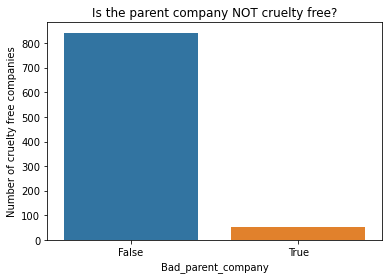

In [128]:
# import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(data=brand_df, x='Bad_parent_company')
fig.set_title('Is the parent company NOT cruelty free?')
fig.set_ylabel('Number of cruelty free companies');

In [133]:
# now try with plotly
import plotly.express as px

fig = px.histogram(brand_df, x='Bad_parent_company', color="Black_owned", title='Is the parent company NOT cruelty-free?')
fig.show();

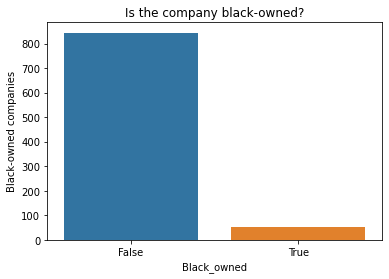

In [135]:
fig = sns.countplot(data=brand_df, x='Black_owned')
fig.set_title('Is the company black-owned?')
fig.set_ylabel('Black-owned companies');

In [136]:
# check out vegan brand values, along with which are black-owned
fig = px.histogram(brand_df, x='Is_vegan', color="Black_owned", title='Are these products vegan?')
fig.show();

In [149]:
# are there any vegan brands owned by a company that is not cruelty free
brand_df[brand_df.Is_vegan & brand_df.Bad_parent_company]

,Brand,Is_vegan,Bad_parent_company,Black_owned
165,Certain Dri,True,True,False
217,dermaGEEK,True,True,False
249,Ecover,True,True,False
345,Hello Products,True,True,False
427,KKW Fragrance,True,True,False
444,Kylie Skin,True,True,False
539,Method,True,True,False
625,"Ordinary, The",True,True,False
686,Pureology,True,True,False
728,Schmidt’s Naturals,True,True,False


There sure are!  Let's graph this in two different ways.

In [150]:
fig = px.histogram(brand_df, x='Bad_parent_company', color='Is_vegan', title='Brands owned by Animal Testing Companies')
fig.show();

In [151]:
fig = px.histogram(brand_df, x='Is_vegan', color='Bad_parent_company', title='Is the brand vegan?')
fig.show();

In [137]:
veg_cf_black = brand_df[brand_df.Is_vegan & brand_df.Black_owned & ~brand_df.Bad_parent_company]

## Companies that are vegan, black-owned, *and* do not have a parent company that isn't cruelty free ##

In [139]:
for brand in veg_cf_black['Brand']:
    print(brand)
    
print('\nThere are {} companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.'.format(len(veg_cf_black)))

Afrocenchix 
Dehiya 
Dimension Nails 
Dirt Don’t Hurt Me 
Jane Carter Solution 
LYS Beauty 
Mented Cosmetics 
Mocha Whip 
Nash + Pino 
OOO Polish (Triple O Polish) 
Pear Nova 
People of Color Beauty 
Sabreen Cosmetics 
September Rose Co 
Shimirose 
SIMKHA 

There are 16 companies that are vegan, black-owned, and do not have a parent company that participates in animal testing.


## Black-owned companies ##

In [144]:
brand_df[brand_df.Black_owned]['Brand']

12                           Ace Beaute 
20                          Aeva Beauty 
21                          Afrocenchix 
41                          Anita Grant 
98                 BeautyStat Cosmetics 
99                       Beauty Bakerie 
103                     Beauty By Stony 
134                     Bold Brand, The 
139    Bossy Cosmetics (Bossy Lipstick) 
184            Coloured Raine Cosmetics 
211                              Dehiya 
224                     Dimension Nails 
225                  Dirt Don’t Hurt Me 
235                           DSMD Shop 
267                            Eu’Genia 
314                            Glamlite 
357                   Honey Pot Co, The 
386                Jane Carter Solution 
407                     Kalon Kosmetics 
424                    Kitaka of London 
428                   Klarity Kosmetics 
452                       Lamain Beauty 
453                        Lamik Beauty 
463                      Leilano Beauty 
479             

## "Cruelty free" products whose parent companies are *NOT* cruelty free! ##

In [146]:
brand_df[brand_df.Bad_parent_company]['Brand']

10                      ABBA Pure Performance Hair Care 
70                                                Aveda 
71                                         Awake Beauty 
85                                         bareMinerals 
106                                               Becca 
144                                             Briogeo 
150                                         Burt’s Bees 
152                                               Buxom 
159                                             Caldrea 
165                                         Certain Dri 
169                                Chemistry Brand, The 
195                                           COVERGIRL 
216                             Dermablend Professional 
217                                           dermaGEEK 
218                                         Dermalogica 
221                                            DevaCurl 
233                                      Drunk Elephant 
249                            

Next, I'll be looking for brands sold by different stores.